In [1]:
import numpy as np
import pandas as pd

In [3]:
#train_data
data_tr = pd.read_csv('C:\\Users\\Admin\\Desktop\\nlp research\\proj data\\train.csv')

dic = {'figurative':1, 'irony':2, 'regular':3, 'sarcasm':4, 'general':5}
data_tr['state'] = data_tr['class'].map(dic)
data_tr['state'] = data_tr['state'].astype('category').cat.codes
data_tr['sar'] = np.where(data_tr['class'] == 'sarcasm', 1, 0)
#data_tr.dropna(subset = ['tweets'], inplace = True)
#d2 = data_tr.replace(np.nan, "general", regex = True)
data_tr.to_csv('sar_tr.csv')
data_tr

,tweets,class,state,sar
0,Be aware di y step to get money #staylight...,figurative,0,0
1,# for #people who don't understand #diy #a ...,figurative,0,0
2,IminworkJeremy medsingle #DailyMail readers ...,figurative,0,0
3,wilw Why do I get the feeling you like games? #,figurative,0,0
4,- TeacherA hurG rweinga en You probably j...,figurative,0,0
...,...,...,...,...
251461,politicalnative: The fact that Justice Ro...,general,4,0
251462,TheDemCoalition ://t.co/PIEQfOC3wk,general,4,0
251463,CBS_Herridge: In u ow CBSNews DoD lin...,general,4,0
251464,Coronavirus Fears Have Led To A Golden Age Of ...,general,4,0


In [5]:
#test_data
data_ts = pd.read_csv('C:\\Users\\Admin\\Desktop\\nlp research\\proj data\\test.csv')

data_ts['state'] = data_ts['class'].map(dic)
data_ts['state'] = data_ts['state'].astype('category').cat.codes
data_ts['sar'] = np.where(data_ts['class'] == 'sarcasm', 1, 0)
data_ts.to_csv('sar_ts.csv')
data_ts.tail()

,tweets,class,state,sar
47943,RT @Jim_Jordan: The Comey FBI lied to the FISA...,general,4,0
47944,RT @DiamondandSilk: Ex-Treasury Employee Plead...,general,4,0
47945,RT @DailyMail: US hospitals are preparing for ...,general,4,0
47946,RT @RealJamesWoods: MY NAME IS BILL W. I like...,general,4,0
47947,@XesLana1 @Scholar_Atheist You said it!,general,4,0


In [7]:
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\nlp research\\proj data\\sar_data 2.csv')
#data.to_csv("sar_data.csv")
data.shape

(299414, 5)

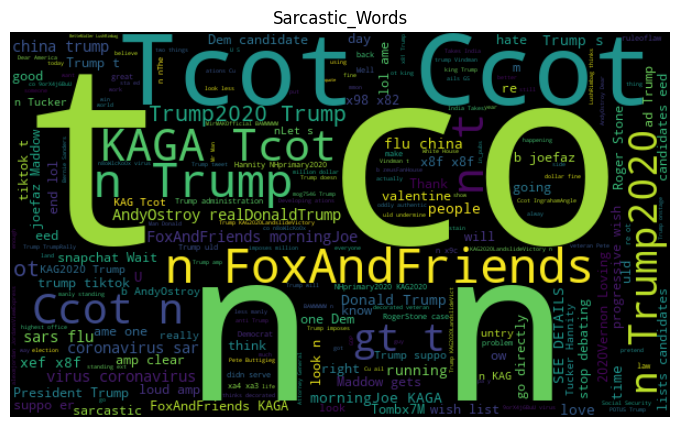

In [9]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
sar_text = ' '.join( 
    data_tr['tweets'][data_tr['class'] == 'sarcasm'].tolist()) 
wordcloud = WordCloud(width=600, height=350, 
                      background_color='black').generate(sar_text) 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Sarcastic_Words') 
plt.savefig('wordcloud.jpg')
plt.show() 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [13]:
#pipeline_creation
tf_idf = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), max_features = 299500)
#x_tr = txt.fit_transform(data_tr['tweets'])
#x_ts = txt.transform(data_ts['tweets'])
x_tr, x_ts, y_tr, y_ts = train_test_split(data['tweets'], data['sar'])

logit = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', random_state = 55)
pipe = Pipeline([('tf_idf', tf_idf), ('logit', logit)])
pipe.fit(x_tr, y_tr)

Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=299500, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logit',
                 LogisticRegression(C=1, penalty='l1', random_state=55,
                                    solver='liblinear'))])

In [15]:
#prediction
y_pred = pipe.predict(x_ts)

In [21]:
#model_performance
acc = accuracy_score(y_ts, y_pred)
clas = classification_report(y_ts, y_pred)
cm = confusion_matrix(y_ts, y_pred)

print('accuracy: \n', round(acc,3)*100, '%')
print("report: \n",clas)
print("confusion_matrix: \n", cm)

accuracy: 
 92.80000000000001 %
report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     42783
           1       0.93      0.90      0.91     32071

    accuracy                           0.93     74854
   macro avg       0.93      0.92      0.93     74854
weighted avg       0.93      0.93      0.93     74854

confusion_matrix: 
 [[40475  2308]
 [ 3104 28967]]


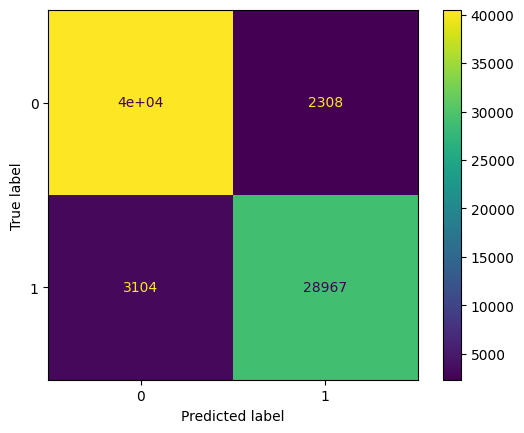

In [19]:
#visual_representation
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_disp.plot()
plt.savefig('confusion_matrix.jpg')
plt.show()

In [11]:
#samp_tf_voc
txt = data_ts['tweets'].head().tolist()
tf = TfidfVectorizer(analyzer = 'word')
tf_fit = tf.fit(txt)
tf_tr = tf_fit.transform(txt)
ind = tf.vocabulary_
print('word index\n', ind)

word index
 {'no': 31, 'one': 33, 'ever': 11, 'predicted': 35, 'this': 47, 'was': 54, 'going': 15, 'to': 50, 'happen': 16, 'sarcasm': 39, 'https': 17, 'co': 7, 'eejsozdykc': 9, 'stooshie': 43, 'its': 23, 'as': 4, 'closely': 6, 'related': 37, 'andrews': 3, 'original': 34, 'claim': 5, 'that': 44, 'evolution': 12, 'and': 2, 'entropy': 10, 'find': 13, 'it': 22, 'ironic': 20, 'when': 55, 'vegans': 52, 'say': 40, 'they': 46, 'love': 28, 'food': 14, 'irony': 21, 'quick': 36, 'rt': 38, 'throwing': 48, 'money': 30, 'vine': 53, 've': 51, 'not': 32, 'seen': 42, '30': 0, 'times': 49, 'in': 18, 'the': 45, 'last': 26, 'seconds': 41, 'yep': 56, 'keep': 25, 'adding': 1, 'me': 29, 'your': 57, 'devops': 8, 'lists': 27, 'justsaying': 24, 'infosec': 19}


In [12]:
#samp_tf-idf_matrix
idf = tf.idf_
print('idf values\n', dict(zip(tf_fit.get_feature_names_out(), idf)))
print("\nSamp tf-idf sparse-matrix \n ", tf_tr.toarray())

idf values
 {'30': 2.09861228866811, 'adding': 2.09861228866811, 'and': 2.09861228866811, 'andrews': 2.09861228866811, 'as': 2.09861228866811, 'claim': 2.09861228866811, 'closely': 2.09861228866811, 'co': 2.09861228866811, 'devops': 2.09861228866811, 'eejsozdykc': 2.09861228866811, 'entropy': 2.09861228866811, 'ever': 2.09861228866811, 'evolution': 2.09861228866811, 'find': 2.09861228866811, 'food': 2.09861228866811, 'going': 2.09861228866811, 'happen': 2.09861228866811, 'https': 2.09861228866811, 'in': 2.09861228866811, 'infosec': 2.09861228866811, 'ironic': 2.09861228866811, 'irony': 1.6931471805599454, 'it': 1.6931471805599454, 'its': 2.09861228866811, 'justsaying': 2.09861228866811, 'keep': 2.09861228866811, 'last': 2.09861228866811, 'lists': 2.09861228866811, 'love': 2.09861228866811, 'me': 2.09861228866811, 'money': 2.09861228866811, 'no': 2.09861228866811, 'not': 2.09861228866811, 'one': 2.09861228866811, 'original': 2.09861228866811, 'predicted': 2.09861228866811, 'quick': 2.09

In [23]:
import pickle
pkl_file = "log_sar.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(pipe, file)

In [29]:
with open(pkl_file, 'rb') as file:  
    model = pickle.load(file) 
def test(l_ts):
    y_pre = model.predict(l_ts)
    return y_pre

l_ts = []
sent = input("enter the comment: ")
l_ts.append(sent)
val = test(l_ts)
for pred in val:
    if pred:
        print("sarcastic")
    else:
        print("non-sarcastic")

enter the comment:  it was a great sunny day


sarcastic
